# Integrantes sala 7
- Guillermo Jair Montiel Juárez
- Juan Nicolás Pinilla Morales
- Melesio Reyes Perez
- Felipe Paez Gonzales
- Daniel HerreraCaballero

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



--- Modelo: MultinomialNB ---
Tiempo de entrenamiento: 0.0646 segundos
Reporte de Clasificación:
                                                            precision    recall  f1-score   support

                                               AI Engineer       0.00      0.00      0.00         1
                                     AI Research Scientist       0.00      0.00      0.00         1
                                            AI/ML Engineer       0.00      0.00      0.00         4
                       Analista de Análise de Dados Junior       0.00      0.00      0.00         1
                                      Analista de Dados II       0.00      0.00      0.00         1
      Analista de Dados Jr (área de Fraude) - São Paulo/SP       0.00      0.00      0.00         1
                       Analista de Dados Júnior | Data Viz       0.00      0.00      0.00         1
                     Analista de Dados de Operações Junior       0.00      0.00      0.00         1
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


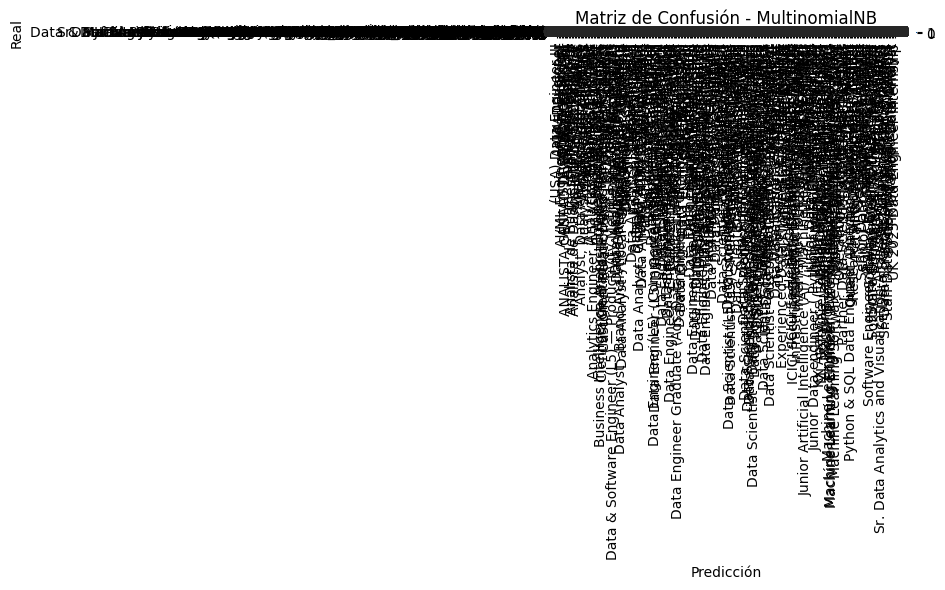


--- Modelo: LogisticRegression ---
Tiempo de entrenamiento: 9.5847 segundos
Reporte de Clasificación:
                                                            precision    recall  f1-score   support

                                               AI Engineer       0.00      0.00      0.00         1
                                     AI Research Scientist       0.00      0.00      0.00         1
                                            AI/ML Engineer       1.00      0.50      0.67         4
                       Analista de Análise de Dados Junior       0.00      0.00      0.00         1
                                      Analista de Dados II       0.00      0.00      0.00         1
      Analista de Dados Jr (área de Fraude) - São Paulo/SP       0.00      0.00      0.00         1
                       Analista de Dados Júnior | Data Viz       0.00      0.00      0.00         1
                     Analista de Dados de Operações Junior       0.00      0.00      0.00       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


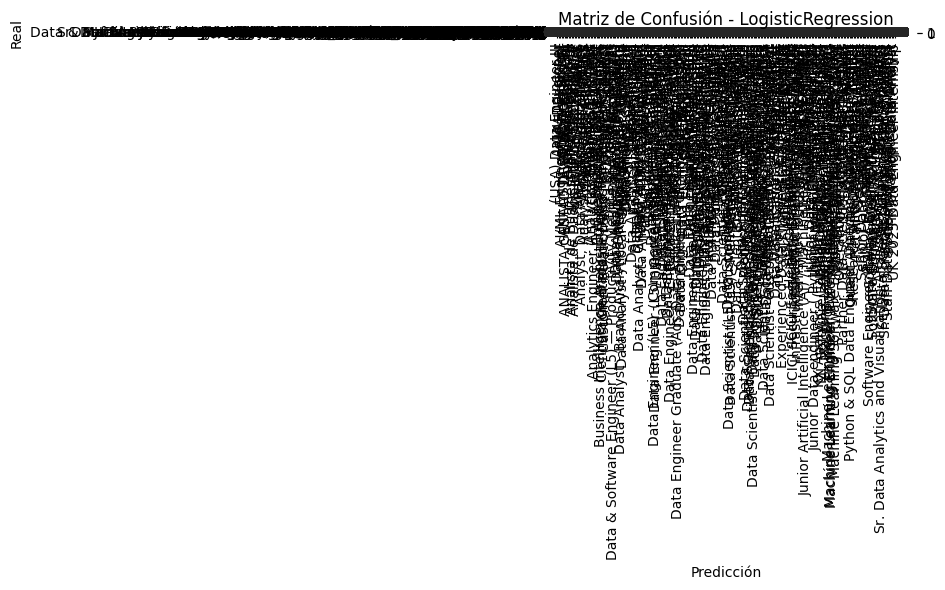

In [ ]:
# ---------- INTEGRANTES SALA 7 ----------
# Guillermo Jair Montiel Juárez
# Juan Nicolás Pinilla Morales
# Melesio Reyes Perez
# Felipe Paez Gonzales
# Daniel HerreraCaballero

# ---------- LIBRERÍAS ----------
!pip install spacy
!python -m spacy download en_core_web_sm
import pandas as pd
import time
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import en_core_web_sm
nlp = en_core_web_sm.load()

# ---------- TOKENIZAMOS ----------
def tokenizer_spacy(texto):
    doc = nlp(texto)
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.like_num]

# ---------- CARGAMOS EL DATASET ----------
df = pd.read_csv("/content/clean_jobs.csv")
df.dropna(subset=['description', 'title'], inplace=True)

# ---------- VECTORIZACIÓN DE LOS DATOS ----------
vectorizer = TfidfVectorizer(tokenizer=tokenizer_spacy, lowercase=True, max_features=5000)
X = vectorizer.fit_transform(df['description'])
y = df['title']

# ---------- DIVISIÓN DE LOS DATOS EN TRAIN/TEST ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- MODELOS QUE SE VAN A USAR ----------
modelos = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# ---------- ENTRENAMIENTO Y EVALUACIÓN ----------
for nombre, modelo in modelos.items():
    print(f"\n--- Modelo: {nombre} ---")

    inicio = time.time()
    modelo.fit(X_train, y_train)
    fin = time.time()

    y_pred = modelo.predict(X_test)

    print(f"Tiempo de entrenamiento: {fin - inicio:.4f} segundos")
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_, normalize='true')
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=modelo.classes_, yticklabels=modelo.classes_)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()